In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.pylab as pylab
import cartopy.feature as cfeature
import scipy.stats as stats
import xarray as xr
import ipdb
import glob
import itertools
import numpy.ma as ma
from utils import u_statistics as u_stat
from scipy.stats import gaussian_kde, linregress
import pickle as pkl
from utils import u_plot as uplot, u_darrays as uda, u_met
import pandas as pd

##for regridding, install xesmf:
# conda install esmpy\\
# pip install xesmf
from utils import constants as cnst

pylab.rcParams['figure.figsize'] = (30., 30.)
#%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
era_march = pkl.load( open (cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA_ERA5_march.p', 'rb'))
era_oct = pkl.load( open (cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA_ERA5_oct.p', 'rb'))
era_all = pkl.load(open (cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA_ERA5_allmonth_5-8N_2000-2014_18UTC_front.p', 'rb'))
#era_all = pkl.load(open (cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA_ERA5_allmonth_2000-2014.p', 'rb'))

In [4]:
era_all.keys()

dict_keys(['u650_s', 'tcwv', 'r_col_s', 'd925_s', 'CAPE_s', 'slp', 'u925', 'q_col', 'lon', 'q_col_s', 'd_col_s', 'divMoist_s', 't2_s', 'level', 'area', 'v_col', 'u_col', 't2', 'CAPE', 'd_col', 't_col', 'tmean', 'q925', 'dates', 'u925_s', 'lat', 't_col_s', 'q700_s', 'divMoist', 'd925', 'area70', 'tcwv_s', 'q925_s', 'q700', 't10', 'v_col_s', 'u_col_s', 'tmin', 'r_col', 'slp_s', 'u650'])

In [5]:
def get_col(var):
    vdic = {}
    vdic['low'] = []
    vdic['high'] = []
    vdic['mean'] = []
    for v in var:
        
        vdic['low'].append(v[16])
        vdic['high'].append(v[9])
        vdic['mean'].append(np.array(v).mean())        
    return vdic

In [130]:
def get_q(var):
    vdic = {}
    vdic['low'] = []
    for v in var:
        
        vdic['low'].append(np.array(v[13:17]).mean())   #10:19 is 750 to 925 [13:17]  , midl 11:13
     
    return vdic

In [131]:
np.median(era_all['q_col'])

0.005759291

In [132]:
np.median(era_all['q925'])

0.015540344640612602

In [133]:
era_all.keys()

dict_keys(['u650_s', 'tcwv', 'r_col_s', 'd925_s', 'CAPE_s', 'slp', 'u925', 'q_col', 'lon', 'q_col_s', 'd_col_s', 'divMoist_s', 't2_s', 'area', 'v_col', 'u_col', 't2', 'CAPE', 'd_col', 't_col', 'tmean', 'q925', 'dates', 'u925_s', 'q_col_sum', 'lat', 't_col_s', 'q700_s', 'q_col_sum_s', 'divMoist', 'd925', 'area70', 'tcwv_s', 'q925_s', 'q700', 't10', 'v_col_s', 'u_col_s', 'tmin', 'r_col', 'slp_s', 'u650'])

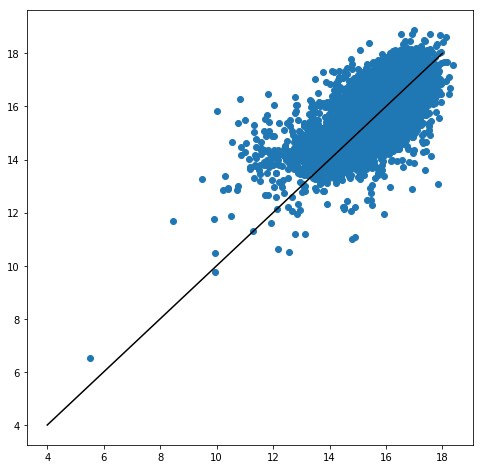

In [134]:
plt.figure(figsize=(8,8))
plt.scatter(np.array(era_all['q925_s'])*1000,np.array(era_all['q925'])*1000)
plt.plot(np.arange(4,19), np.arange(4,19), 'k')

In [135]:
diff = np.array(era_all['q925_s'])*1000-np.array(era_all['q925'])*1000
print(np.sum(diff>0))
print(np.sum(diff<0))

6550
7008


In [136]:
level = era_march.pop('level')
level = era_oct.pop('level')
level = era_all.pop('level')

KeyError: 'level'

In [137]:
level

[200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 825,
 850,
 875,
 900,
 925,
 950,
 975,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 825,
 850,
 875,
 900,
 925,
 950,
 975,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 825,
 850,
 875,
 900,
 925,
 950,
 975,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 825,
 850,
 875,
 900,
 925,
 950,
 975,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 825,
 850,
 875,
 900,
 925,
 950,
 975,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 825,
 850,
 875,
 900,
 925,
 950,
 975,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 825,
 850,
 875,
 900,
 925,
 950,
 975,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 825,
 850,
 875,
 900,
 925,
 950,
 975,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 825,
 850,
 875

In [138]:
for k in era_march.keys():
    era_march[k] = era_march[k][0:1841]

In [139]:
for k in era_oct.keys():
    era_oct[k] = era_oct[k][0:2096]

In [140]:
np.array(era_oct['CAPE']).mean()

1063.4757279858334

In [141]:
np.array(era_march['CAPE']).mean()

1237.0779014713798

In [142]:
era_all_qsum = get_q(era_all['q_col'])
era_all['q_col_sum'] = era_all_qsum['low']
era_all_qsum_storm = get_q(era_all['q_col_s'])
era_all['q_col_sum_s'] = era_all_qsum_storm['low']

In [143]:
era_new = era_all.copy()
octt = era_all.copy()
marchh = era_all.copy()

In [144]:
for k in era_all.keys():
    print(k)
#     if k == 'dates':
#         continue
    varlist = []
    varo = []
    varm = []
    for ids, ise in enumerate(era_all[k]):
        if (era_all['dates'][ids].month <=6) | (era_all['dates'][ids].month >=9):
            varlist.append(ise)
        if era_all['dates'][ids].month == 3:
            varm.append(ise)
        if era_all['dates'][ids].month == 10:
            varo.append(ise)
    era_new[k] = np.array(varlist)          
    octt[k] = np.array(varo)
    marchh[k] = np.array(varm)

u650_s
tcwv
r_col_s
d925_s
CAPE_s
slp
u925
q_col
lon
q_col_s
d_col_s
divMoist_s
t2_s
area
v_col
u_col
t2
CAPE
d_col
t_col
tmean
q925
dates
u925_s
q_col_sum
lat
t_col_s
q700_s
q_col_sum_s
divMoist
d925
area70
tcwv_s
q925_s
q700
t10
v_col_s
u_col_s
tmin
r_col
slp_s
u650


In [145]:
qmsort = np.argsort(marchh['q925'])
qm = marchh['q925'][qmsort]

In [146]:
qesort = np.argsort(np.array(era_march['q925']))
qe = np.array(era_march['q925'])[qesort]

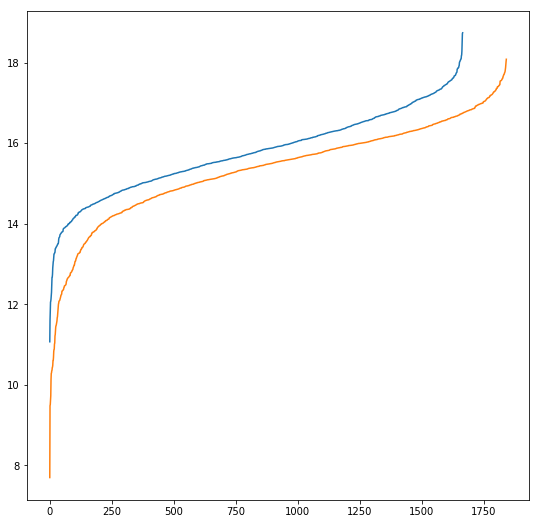

In [147]:
f=plt.figure(figsize=(9,9))
ax = f.add_subplot(111)
plt.plot(qm*1000)
plt.plot(qe*1000)

In [148]:
print(marchh['CAPE'].mean())
print(marchh['CAPE_s'].mean())

1309.1088437137566
1365.0517271146664


In [149]:
print(octt['CAPE'].mean())
print(octt['CAPE_s'].mean())

975.1696709457512
716.3532934943134


In [150]:
def sort_vars(dic):
    q925 = np.array(dic['q_col_sum'])
    q925s = np.array(dic['q_col_sum_s'])
    
    udic = get_col(dic['u_col'])
    vdic = get_col(dic['v_col'])
    
    ushear = (np.array(udic['high'])-np.array(udic['low']))
    vshear = (np.array(vdic['high'])-np.array(vdic['low']))
    shearss = u_met.u_v_to_ws_wd(ushear, vshear)
    
    shears = shearss[0]
    #shears = np.array(dic['u650']) - np.array(dic['u925']) #shearss[0]
    q925 = q925 #(q925s-
    sort = np.argsort(q925)
    q = q925[sort]*1000
    shear = shears[sort]
    tmin = np.array(dic['tmean'])[sort]
    linsp = np.linspace(0,len(q)-1,10)
    
    inds = np.round(linsp).astype(int)
    #ipdb.set_trace()
    f=plt.figure(figsize=(13,9))
    ax = f.add_subplot(311)
    plt.plot(q)
    #plt.ylim(8,18)
    ax = f.add_subplot(312)
    plt.plot(shear,'r')
    ax = f.add_subplot(313)
    plt.plot(tmin,'k')
    
    plt.show()
    
    qmean = []
    corr = []
    qcorr = []
    
    for start,end in enumerate(inds[2::]):  #
        #ipdb.set_trace()
        qmean.append(np.median(q[inds[start]:end]))
        corr.append(stats.pearsonr(shear[inds[start]:end],tmin[inds[start]:end])[0])    
        qcorr.append(stats.pearsonr(shear[inds[start]:end],q[inds[start]:end])[0])  

#         ttslope, intercept, r, p, std_err = linregress(shear[start:end],tmin[start:end])
#         ccslope, intercept, r, p, std_err = linregress(shear[start:end],q[start:end])
#         corr.append(ttslope)    
#         qcorr.append(ccslope)  
    return qmean, corr, qcorr

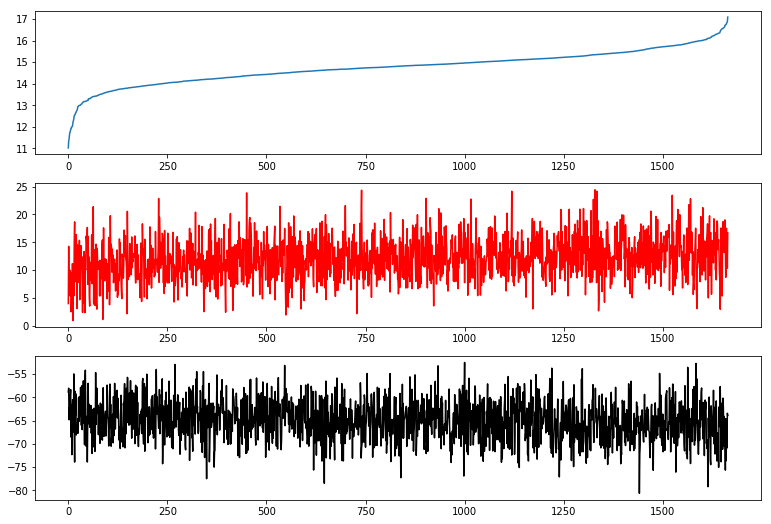

In [151]:
qmean_march, corr_march, qcorr_march = sort_vars(marchh)

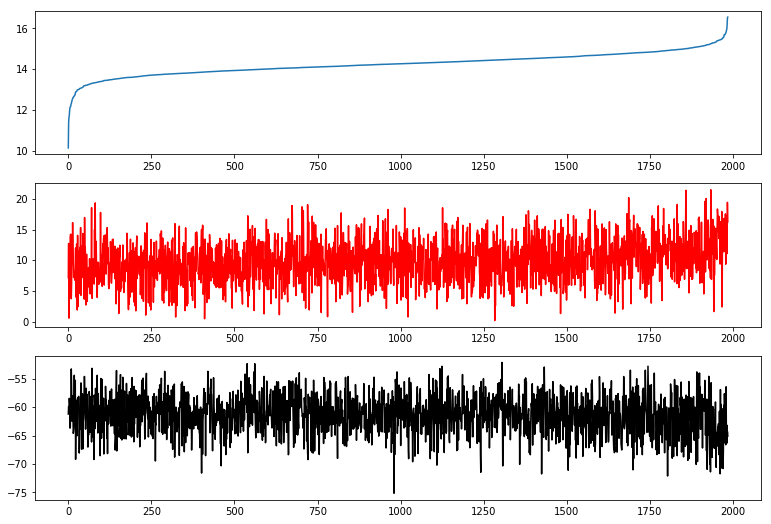

In [152]:
qmean_oct, corr_oct, qcorr_oct = sort_vars(octt)

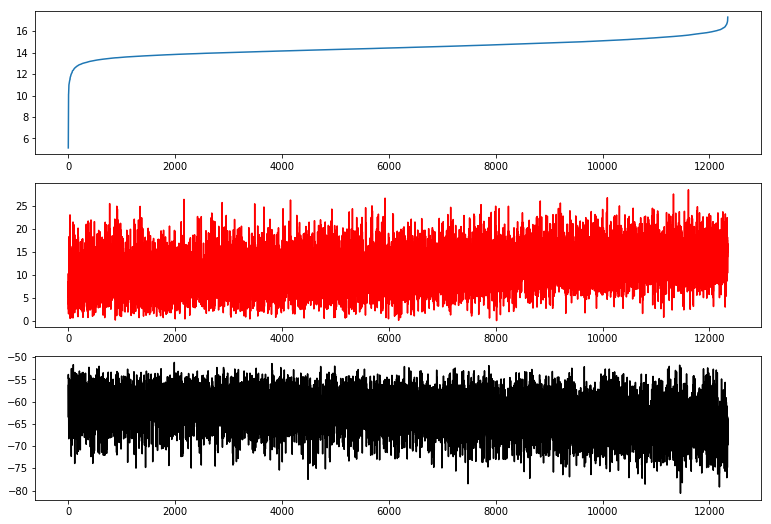

In [153]:
qmean_all, corr_all, qcorr_all = sort_vars(era_new)

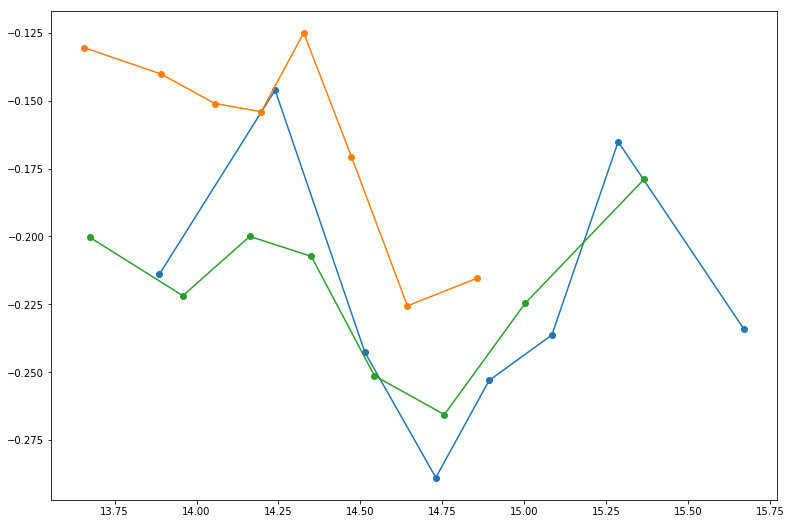

In [154]:
plt.figure(figsize=(13,9))
plt.plot(np.array(qmean_march),corr_march, '-o')
plt.plot(np.array(qmean_oct),corr_oct, '-o')
plt.plot(np.array(qmean_all),corr_all, '-o')

In [155]:
def sort_vars(dic):
    q925e = np.array(dic['q_col_sum'])
    q925s = np.array(dic['q_col_sum_s'])
    
    udic = get_col(dic['u_col'])
    vdic = get_col(dic['v_col'])
    qdic = get_col(dic['q_col'])
    qdics = get_col(dic['q_col_s'])
    
    ushear = (np.array(udic['high'])-np.array(udic['low']))
    vshear = (np.array(vdic['high'])-np.array(vdic['low']))
    shearss = u_met.u_v_to_ws_wd(ushear, vshear)
    shears = np.array(dic['u650']) - np.array(dic['u925']) #shearss[0]
    
    
    q925 = (q925s-q925e)/q925s #np.array(qdics['high'])-np.array(qdic['high'])#
    sort = np.argsort(q925e)
    q = q925[sort]
    shear = shears[sort]
    tmin = np.array(dic['tmin'])[sort]
    linsp = np.linspace(0,len(q)-1,15)
    
    inds = np.round(linsp).astype(int)
    #ipdb.set_trace()
    f=plt.figure(figsize=(13,9))
    ax = f.add_subplot(311)
    plt.plot(q)
    #plt.ylim(8,18)
    ax = f.add_subplot(312)
    plt.plot(shear,'r')
    ax = f.add_subplot(313)
    plt.plot(tmin,'k')
    
    plt.show()
    
    qmean = []
    corr = []
    qcorr = []
    
    for start,end in enumerate(inds[2::]):  #
        #ipdb.set_trace()
        qmean.append(np.median(q[inds[start]:end]))
#         corr.append(stats.pearsonr(shear[start:end],tmin[start:end])[0])    
#         qcorr.append(stats.pearsonr(shear[start:end],q[start:end])[0])  

        ttslope, intercept, rc, p, std_err = linregress(shear[inds[start]:end],tmin[inds[start]:end])    
        ccslope, intercept, rt, p, std_err = linregress(q[inds[start]:end], shear[inds[start]:end])
        corr.append(ttslope) 
        qcorr.append(ccslope) 
    return qmean, corr, qcorr

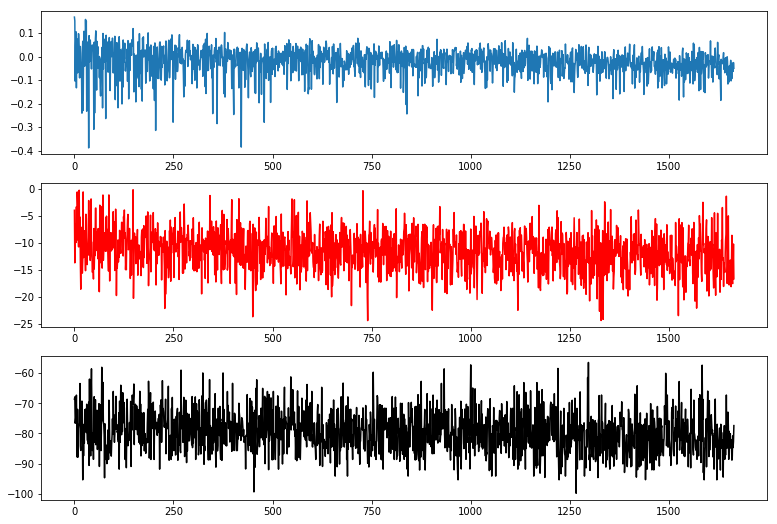

In [156]:
qmean_march, corr_march, qcorr_march = sort_vars(marchh)

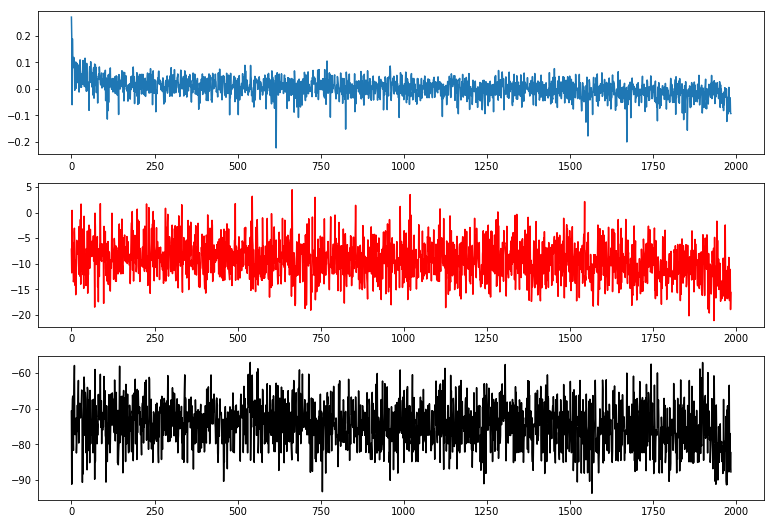

In [157]:
qmean_oct, corr_oct, qcorr_oct = sort_vars(octt)

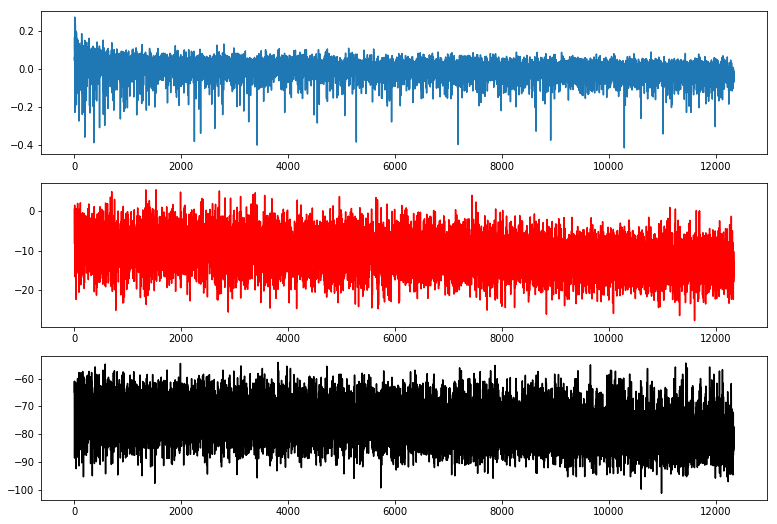

In [158]:
qmean_all, corr_all, qcorr_all = sort_vars(era_new)

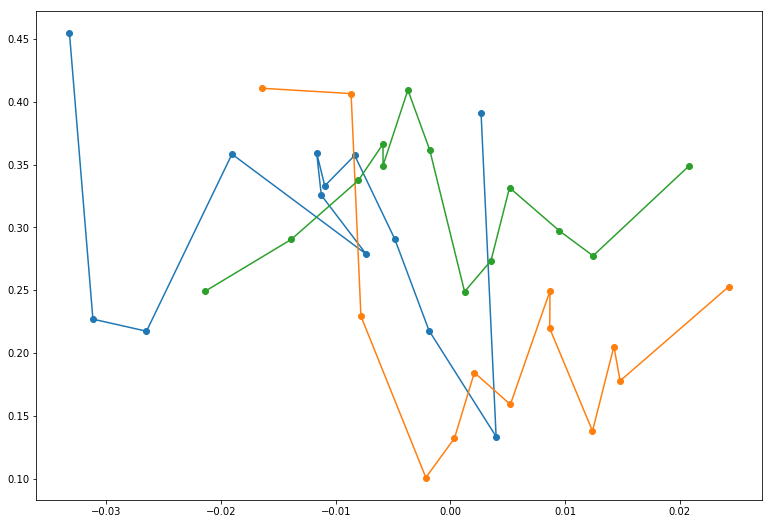

In [159]:
plt.figure(figsize=(13,9))
plt.plot(np.array(qmean_march),corr_march, '-o')
plt.plot(np.array(qmean_oct),corr_oct, '-o')
plt.plot(np.array(qmean_all),corr_all, '-o')

In [236]:
def sort_vars(dic):
    q925e = np.array(dic['q_col_sum'])
    q925s = np.array(dic['q_col_sum_s'])
    
    udic = get_col(dic['u_col'])
    vdic = get_col(dic['v_col'])
    qdic = get_col(dic['q_col'])
    qdics = get_col(dic['q_col_s'])
    
    ushear = (np.array(udic['high'])-np.array(udic['low']))
    vshear = (np.array(vdic['high'])-np.array(vdic['low']))
    shearss = u_met.u_v_to_ws_wd(ushear, vshear)
    shears = shearss[0] # np.array(dic['u650']) - np.array(dic['u925']) #shearss[0]
    
    
    q925 = (q925s-q925e)*10000+0.4 #np.array(qdics['high'])-np.array(qdic['high'])#
    sort = np.argsort(shears)
    q = q925[sort]
    shear = shears[sort]
    tmin = np.array(dic['tmin'])[sort]
    linsp = np.linspace(0,len(q)-1,12)
    
    inds = np.round(linsp).astype(int)
    #ipdb.set_trace()
    f=plt.figure(figsize=(13,9))
    ax = f.add_subplot(311)
    plt.plot(q)
    #plt.ylim(8,18)
    ax = f.add_subplot(312)
    plt.plot(shear,'r')
    ax = f.add_subplot(313)
    plt.plot(tmin,'k')
    
    plt.show()
    
    qmean = []
    corr = []
    qcorr = []
    corr_std = []
    qcorr_std = []
    print(inds)
    for start,end in enumerate(inds[2::]):  #
        print(inds[start], end)
        #ipdb.set_trace()
        qmean.append(np.median(shear[inds[start]:end]))
#         corr.append(stats.pearsonr(shear[start:end],tmin[start:end])[0])    
#         qcorr.append(stats.pearsonr(shear[start:end],q[start:end])[0])  

        ttslope, intercept, rc, p, std_err = linregress(shear[inds[start]:end],tmin[inds[start]:end])    
        ccslope, intercept, rt, p, std_err = linregress(q[inds[start]:end], shear[inds[start]:end])
        
        
        corr.append(np.median(q925[inds[start]:end])) 
        qcorr.append(np.median(tmin[inds[start]:end])) 
        
        corr_std.append(np.percentile(tmin[inds[start]:end],25))
        qcorr_std.append(np.percentile(tmin[inds[start]:end],75)) 
    return qmean, corr, qcorr, corr_std, qcorr_std

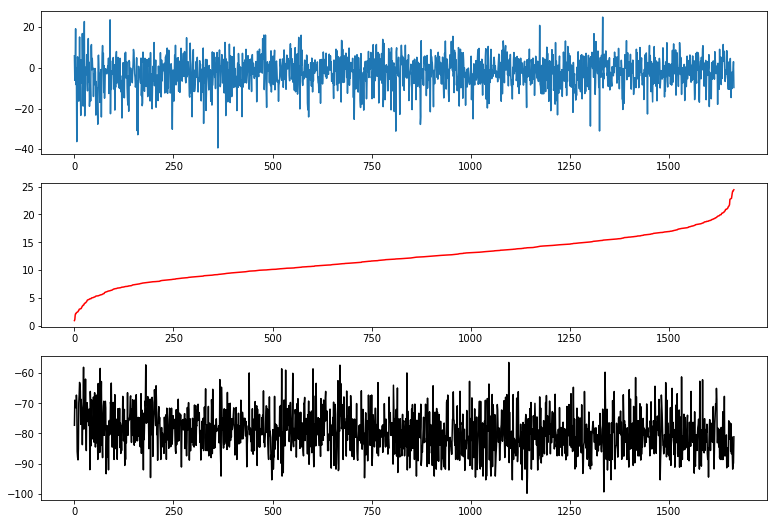

[   0  151  303  454  605  756  908 1059 1210 1361 1513 1664]
0 303
151 454
303 605
454 756
605 908
756 1059
908 1210
1059 1361
1210 1513
1361 1664


In [237]:
qmean_march, corr_march, qcorr_march, corr_march_std, qcorr_march_std = sort_vars(marchh)

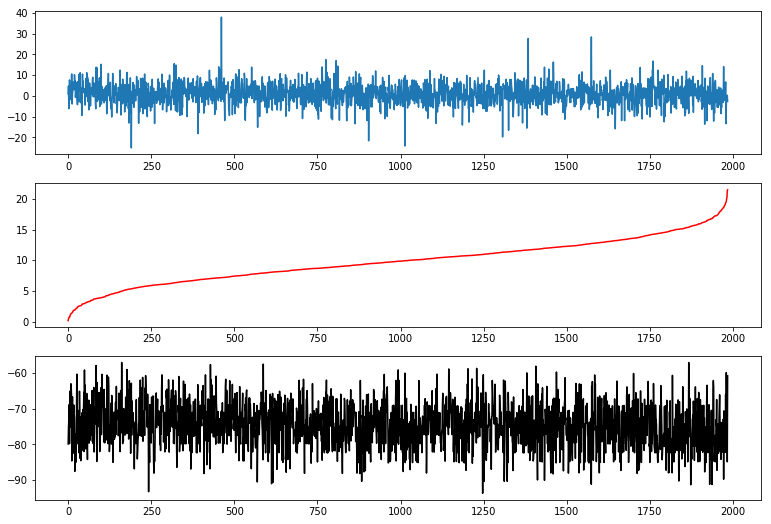

[   0  180  361  541  721  902 1082 1263 1443 1623 1804 1984]
0 361
180 541
361 721
541 902
721 1082
902 1263
1082 1443
1263 1623
1443 1804
1623 1984


In [238]:
qmean_oct, corr_oct, qcorr_oct, corr_oct_std, qcorr_oct_std = sort_vars(octt)

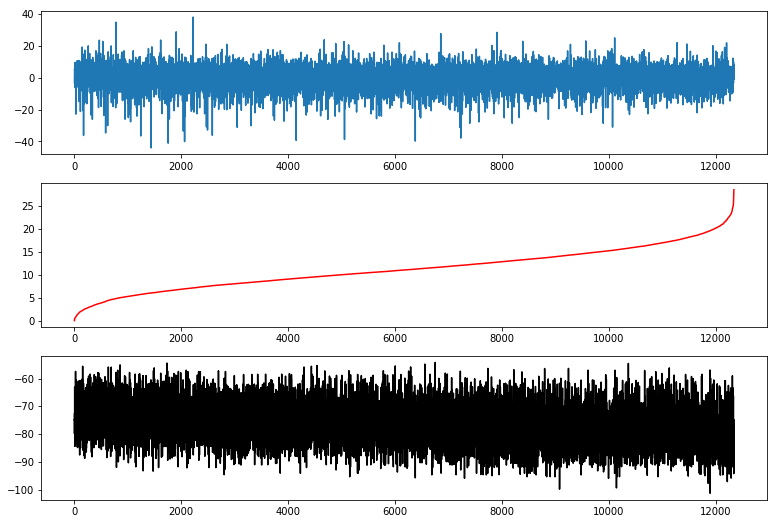

[    0  1122  2244  3366  4488  5610  6733  7855  8977 10099 11221 12343]
0 2244
1122 3366
2244 4488
3366 5610
4488 6733
5610 7855
6733 8977
7855 10099
8977 11221
10099 12343


In [239]:
qmean_all, corr_all, qcorr_all, corr_all_std, qcorr_all_std = sort_vars(era_new)

In [240]:
qcorr_all_std

[-68.489990234375,
 -69.31499099731445,
 -70.3849983215332,
 -70.79998779296875,
 -71.02999877929688,
 -71.72999572753906,
 -72.54499053955078,
 -73.13749694824219,
 -73.68998718261719,
 -74.25999450683594]

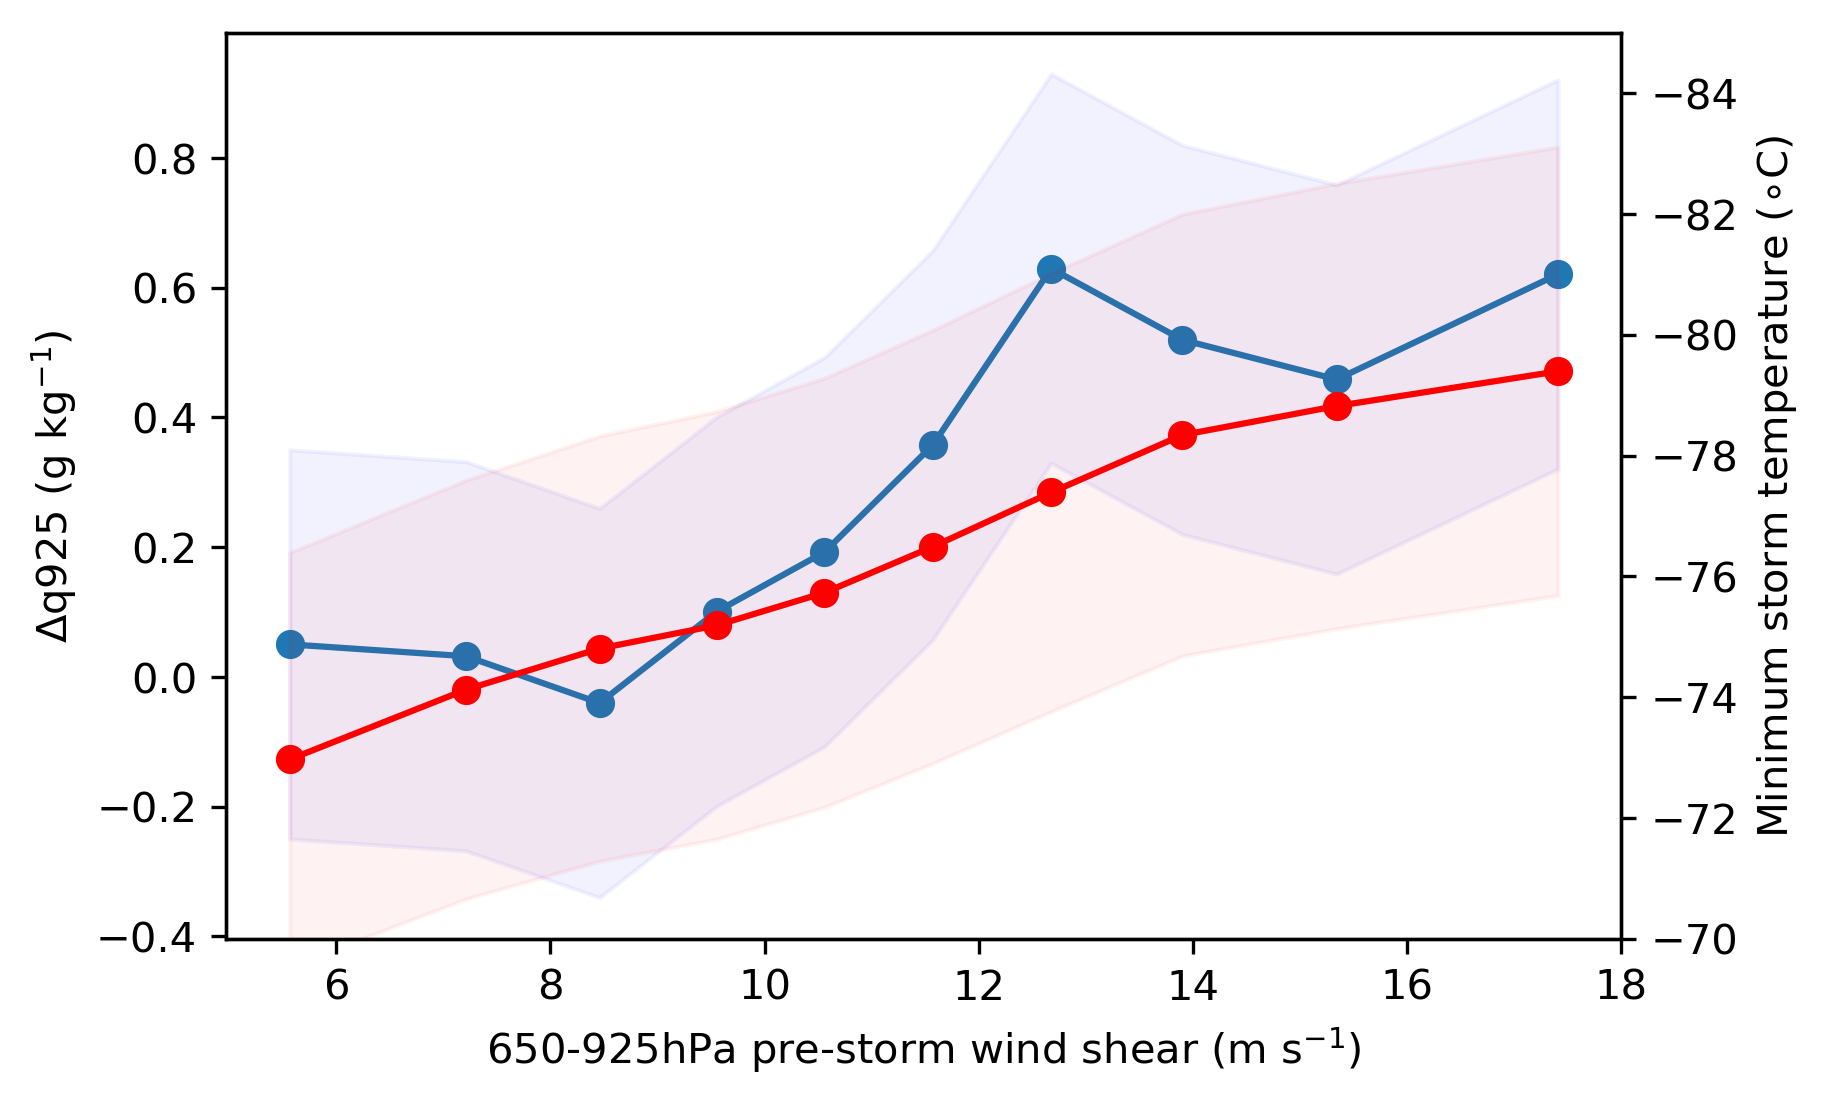

In [244]:
f=plt.figure(figsize=(6,4), dpi=300)
#plt.plot(np.array(qmean_march),corr_march, '-o')
#plt.plot(np.array(qmean_oct),corr_oct, '-o')
x = np.array(qmean_all)
corr_all = np.array(corr_all)
corr_all_std = np.array(corr_all_std)
qcorr_all = np.array(qcorr_all)
qcorr_all_std = np.array(qcorr_all_std)

ax = f.add_subplot(111)
ax.plot(x,corr_all, '-o', label='${\Delta}$q')
ax.fill_between(x,corr_all-0.3, corr_all+0.3, color='b', alpha=0.05)
ax1 = ax.twinx()
ax1.plot(x,qcorr_all, 'ro-', label='Min. storm temperature')
ax1.fill_between(x,qcorr_all-qcorr_all_std*0.05, qcorr_all+qcorr_all_std*0.05, color='r', alpha=0.05)
#ax1.errorbar(x, qcorr_all, yerr=qcorr_all_std*0.05, fmt='.k');
ax1.set_ylim(-85,-70)
ax1.set_ylim(ax1.get_ylim()[::-1])
ax.set_xlabel('650-925hPa pre-storm wind shear (m s$^{-1}$)')
ax.set_ylabel('${\Delta}$q925 (g kg$^{-1}$)')
ax1.set_ylabel('Minimum storm temperature (${\circ}$C)')

#plt.savefig('/home/ck/DIR/cornkle/figs/CLOVER/deltaQ_pre-stormTime.png')
deltaQ_dic = {
    'tminx' : x,
    'tminy' : qcorr_all,
    'deltaqy' : corr_all,
    'tminstd' : qcorr_all_std  
}
#plt.savefig('/home/ck/DIR/cornkle/figs/CLOVER/deltaQ_pre-stormTime.png')
pkl.dump(deltaQ_dic, open(cnst.network_data + 'data/CLOVER/saves/deltaQ_plot.p',
                           'wb'))

In [235]:
def sort_vars(dic):
    q925e = dic['t2']#np.array(dic['q_col_sum'])
    q925s = dic['t2_s']#np.array(dic['q_col_sum_s'])
    
    udic = get_col(dic['u_col'])
    vdic = get_col(dic['v_col'])
    qdic = get_col(dic['q_col'])
    qdics = get_col(dic['q_col_s'])
    
    ushear = (np.array(udic['high'])-np.array(udic['low']))
    vshear = (np.array(vdic['high'])-np.array(vdic['low']))
    shearss = u_met.u_v_to_ws_wd(ushear, vshear)
    shears = shearss[0] # np.array(dic['u650']) - np.array(dic['u925']) #shearss[0]
    
    
    q925 = (q925e-q925s)#*10000+0.2 #np.array(qdics['high'])-np.array(qdic['high'])#
    sort = np.argsort(shears)
    q = q925[sort]
    shear = shears[sort]
    tmin = np.array(dic['tmin'])[sort]
    linsp = np.linspace(0,len(q)-1,20)
    
    inds = np.round(linsp).astype(int)
    #ipdb.set_trace()
    f=plt.figure(figsize=(13,9))
    ax = f.add_subplot(311)
    plt.plot(q)
    #plt.ylim(8,18)
    ax = f.add_subplot(312)
    plt.plot(shear,'r')
    ax = f.add_subplot(313)
    plt.plot(tmin,'k')
    
    plt.show()
    
    qmean = []
    corr = []
    qcorr = []
    corr_std = []
    qcorr_std = []
    print(inds)
    for start,end in enumerate(inds[2::]):  #
        print(inds[start], end)
        #ipdb.set_trace()
        qmean.append(np.median(shear[inds[start]:end]))
#         corr.append(stats.pearsonr(shear[start:end],tmin[start:end])[0])    
#         qcorr.append(stats.pearsonr(shear[start:end],q[start:end])[0])  

        ttslope, intercept, rc, p, std_err = linregress(shear[inds[start]:end],tmin[inds[start]:end])    
        ccslope, intercept, rt, p, std_err = linregress(q[inds[start]:end], shear[inds[start]:end])
        
        
        corr.append(np.median(q925[inds[start]:end])) 
        qcorr.append(np.median(tmin[inds[start]:end])) 
        
        corr_std.append(np.percentile(tmin[inds[start]:end],25))
        qcorr_std.append(np.percentile(tmin[inds[start]:end],75)) 
    return qmean, corr, qcorr, corr_std, qcorr_std

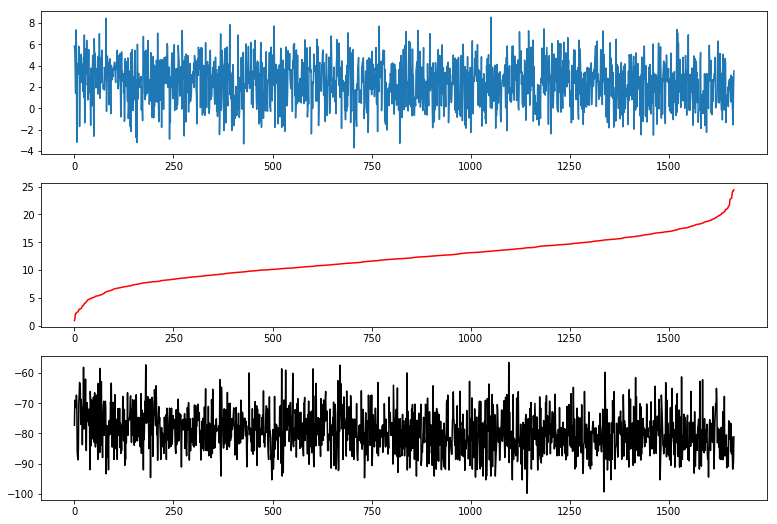

[   0   88  175  263  350  438  525  613  701  788  876  963 1051 1139
 1226 1314 1401 1489 1576 1664]
0 175
88 263
175 350
263 438
350 525
438 613
525 701
613 788
701 876
788 963
876 1051
963 1139
1051 1226
1139 1314
1226 1401
1314 1489
1401 1576
1489 1664


In [225]:
qmean_march, corr_march, qcorr_march, corr_march_std, qcorr_march_std = sort_vars(marchh)

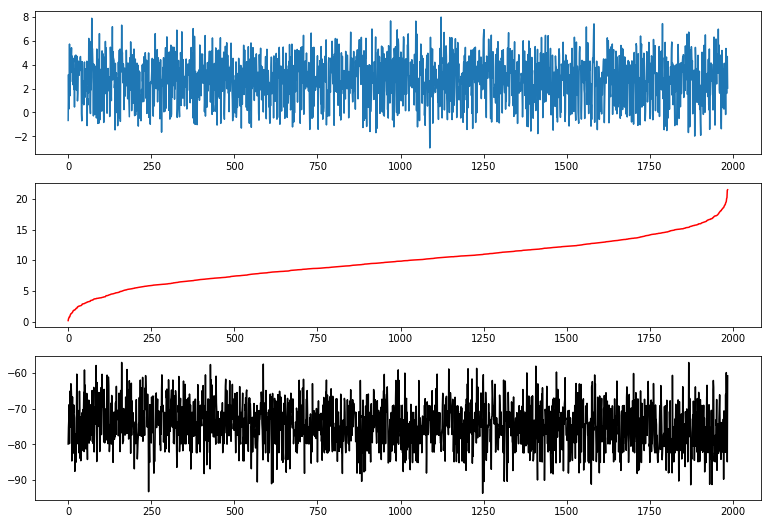

[   0  104  209  313  418  522  627  731  835  940 1044 1149 1253 1357
 1462 1566 1671 1775 1880 1984]
0 209
104 313
209 418
313 522
418 627
522 731
627 835
731 940
835 1044
940 1149
1044 1253
1149 1357
1253 1462
1357 1566
1462 1671
1566 1775
1671 1880
1775 1984


In [226]:
qmean_oct, corr_oct, qcorr_oct, corr_oct_std, qcorr_oct_std = sort_vars(octt)

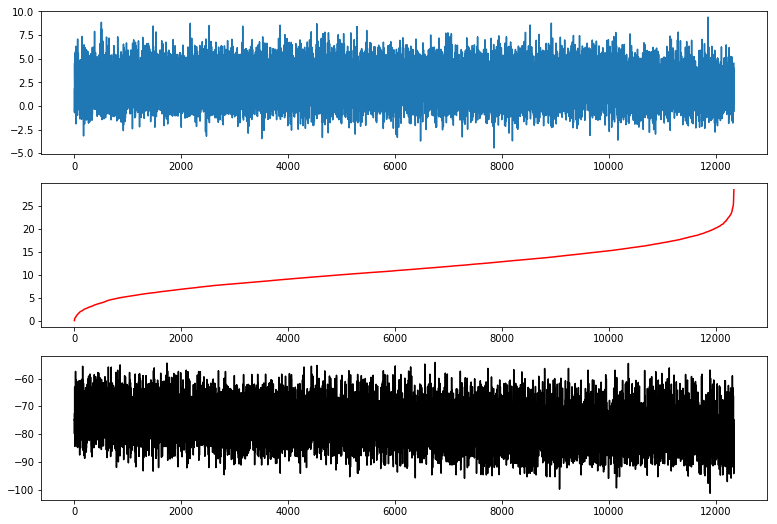

[    0   650  1299  1949  2599  3248  3898  4547  5197  5847  6496  7146
  7796  8445  9095  9744 10394 11044 11693 12343]
0 1299
650 1949
1299 2599
1949 3248
2599 3898
3248 4547
3898 5197
4547 5847
5197 6496
5847 7146
6496 7796
7146 8445
7796 9095
8445 9744
9095 10394
9744 11044
10394 11693
11044 12343


In [227]:
qmean_all, corr_all, qcorr_all, corr_all_std, qcorr_all_std = sort_vars(era_new)

Text(0, 0.5, 'Minimum storm temperature (${\\circ}$C)')

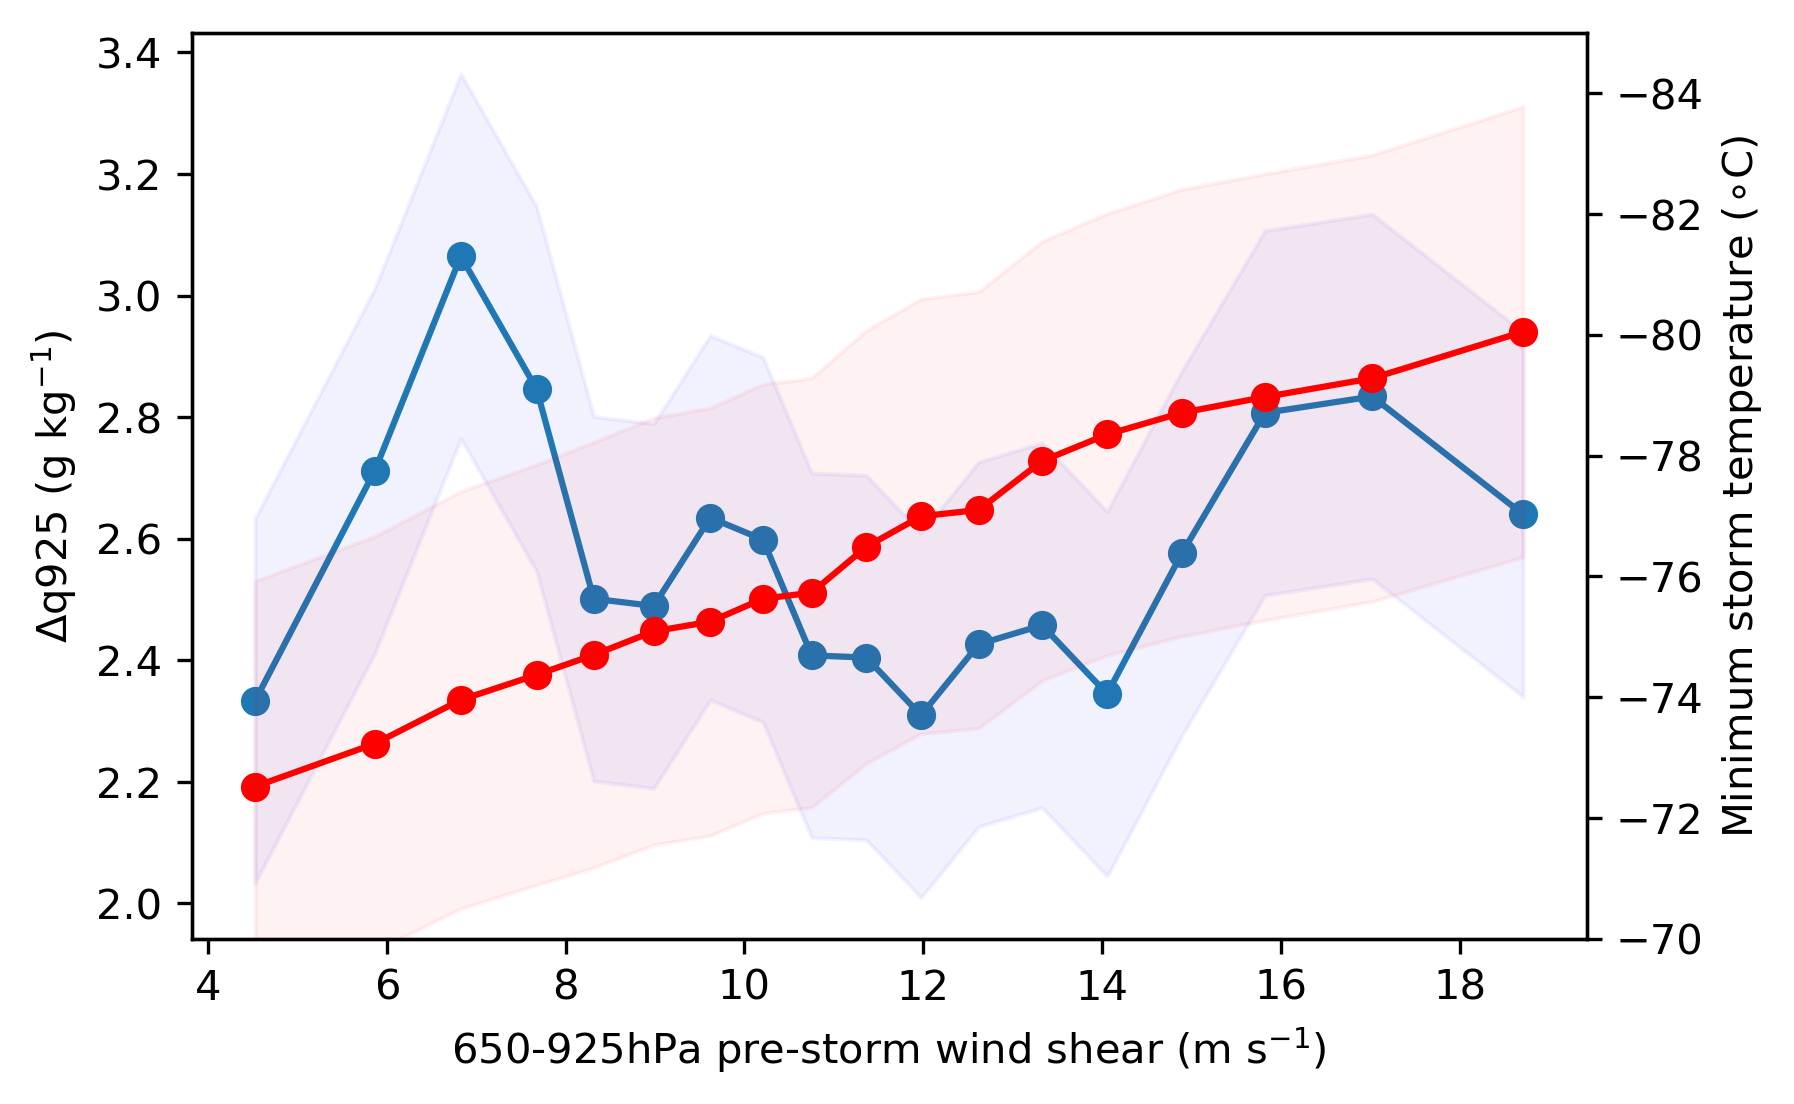

In [228]:
f=plt.figure(figsize=(6,4), dpi=300)
#plt.plot(np.array(qmean_march),corr_march, '-o')
#plt.plot(np.array(qmean_oct),corr_oct, '-o')
x = np.array(qmean_all)
corr_all = np.array(corr_all)
corr_all_std = np.array(corr_all_std)
qcorr_all = np.array(qcorr_all)
qcorr_all_std = np.array(qcorr_all_std)

ax = f.add_subplot(111)
ax.plot(x,corr_all, '-o', label='${\Delta}$q')
ax.fill_between(x,corr_all-0.3, corr_all+0.3, color='b', alpha=0.05)
ax1 = ax.twinx()
ax1.plot(x,qcorr_all, 'ro-', label='Min. storm temperature')
ax1.fill_between(x,qcorr_all-qcorr_all_std*0.05, qcorr_all+qcorr_all_std*0.05, color='r', alpha=0.05)
#ax1.errorbar(x, qcorr_all, yerr=qcorr_all_std*0.05, fmt='.k');
ax1.set_ylim(-85,-70)
ax1.set_ylim(ax1.get_ylim()[::-1])
ax.set_xlabel('650-925hPa pre-storm wind shear (m s$^{-1}$)')
ax.set_ylabel('${\Delta}$q925 (g kg$^{-1}$)')
ax1.set_ylabel('Minimum storm temperature (${\circ}$C)')

#plt.savefig('/home/ck/DIR/cornkle/figs/CLOVER/deltaQ_pre-stormTime.png')

NameError: name 'r_value' is not defined

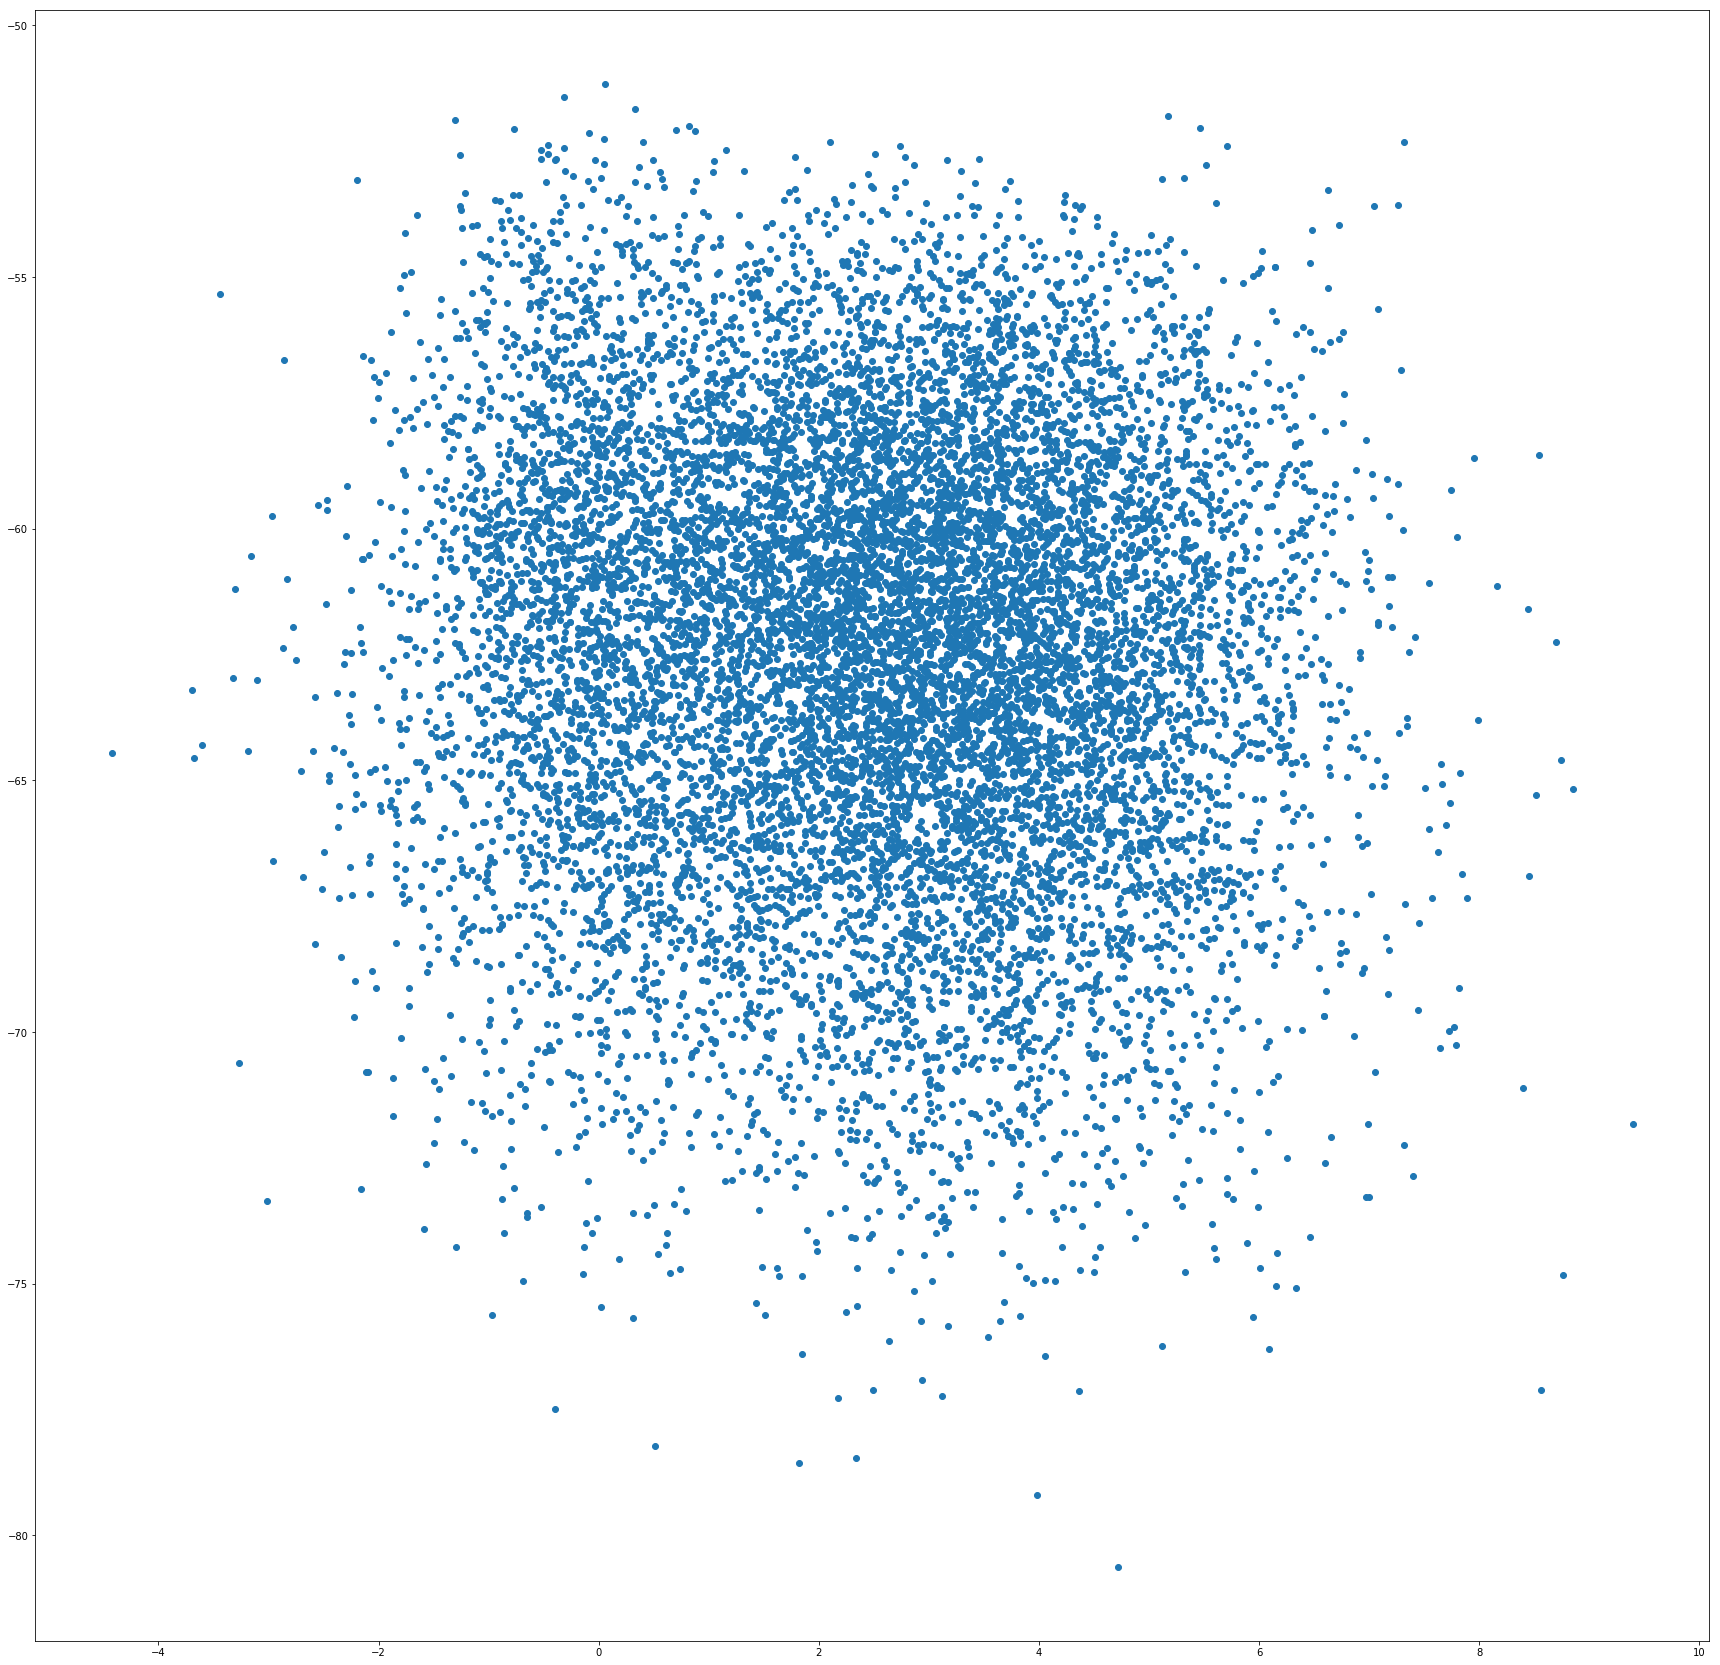

In [88]:
f = plt.figure()
ax = f.add_subplot(111)
x = (era_new['t2']-era_new['t2_s'])
y = (era_new['tmean'])
ax.scatter(x,y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(era_new['t2']-era_new['t2_s'],era_new['divMoist']*1000)
#ax.plot(np.linspace(x.min(),x.max(),6), intercept + np.linspace(x.min(),x.max(),6)*slope, '--', color='r')
print(r_value, p_value)
#ax.set_ylim(-1,1)

(array([  11.,  150., 1214., 2267., 3179., 3793., 2623.,  994.,  163.,
          18.]),
 array([-4.42492676, -3.04277344, -1.66062012, -0.2784668 ,  1.10368652,
         2.48583984,  3.86799316,  5.25014648,  6.6322998 ,  8.01445313,
         9.39660645]),
 <a list of 10 Patch objects>)

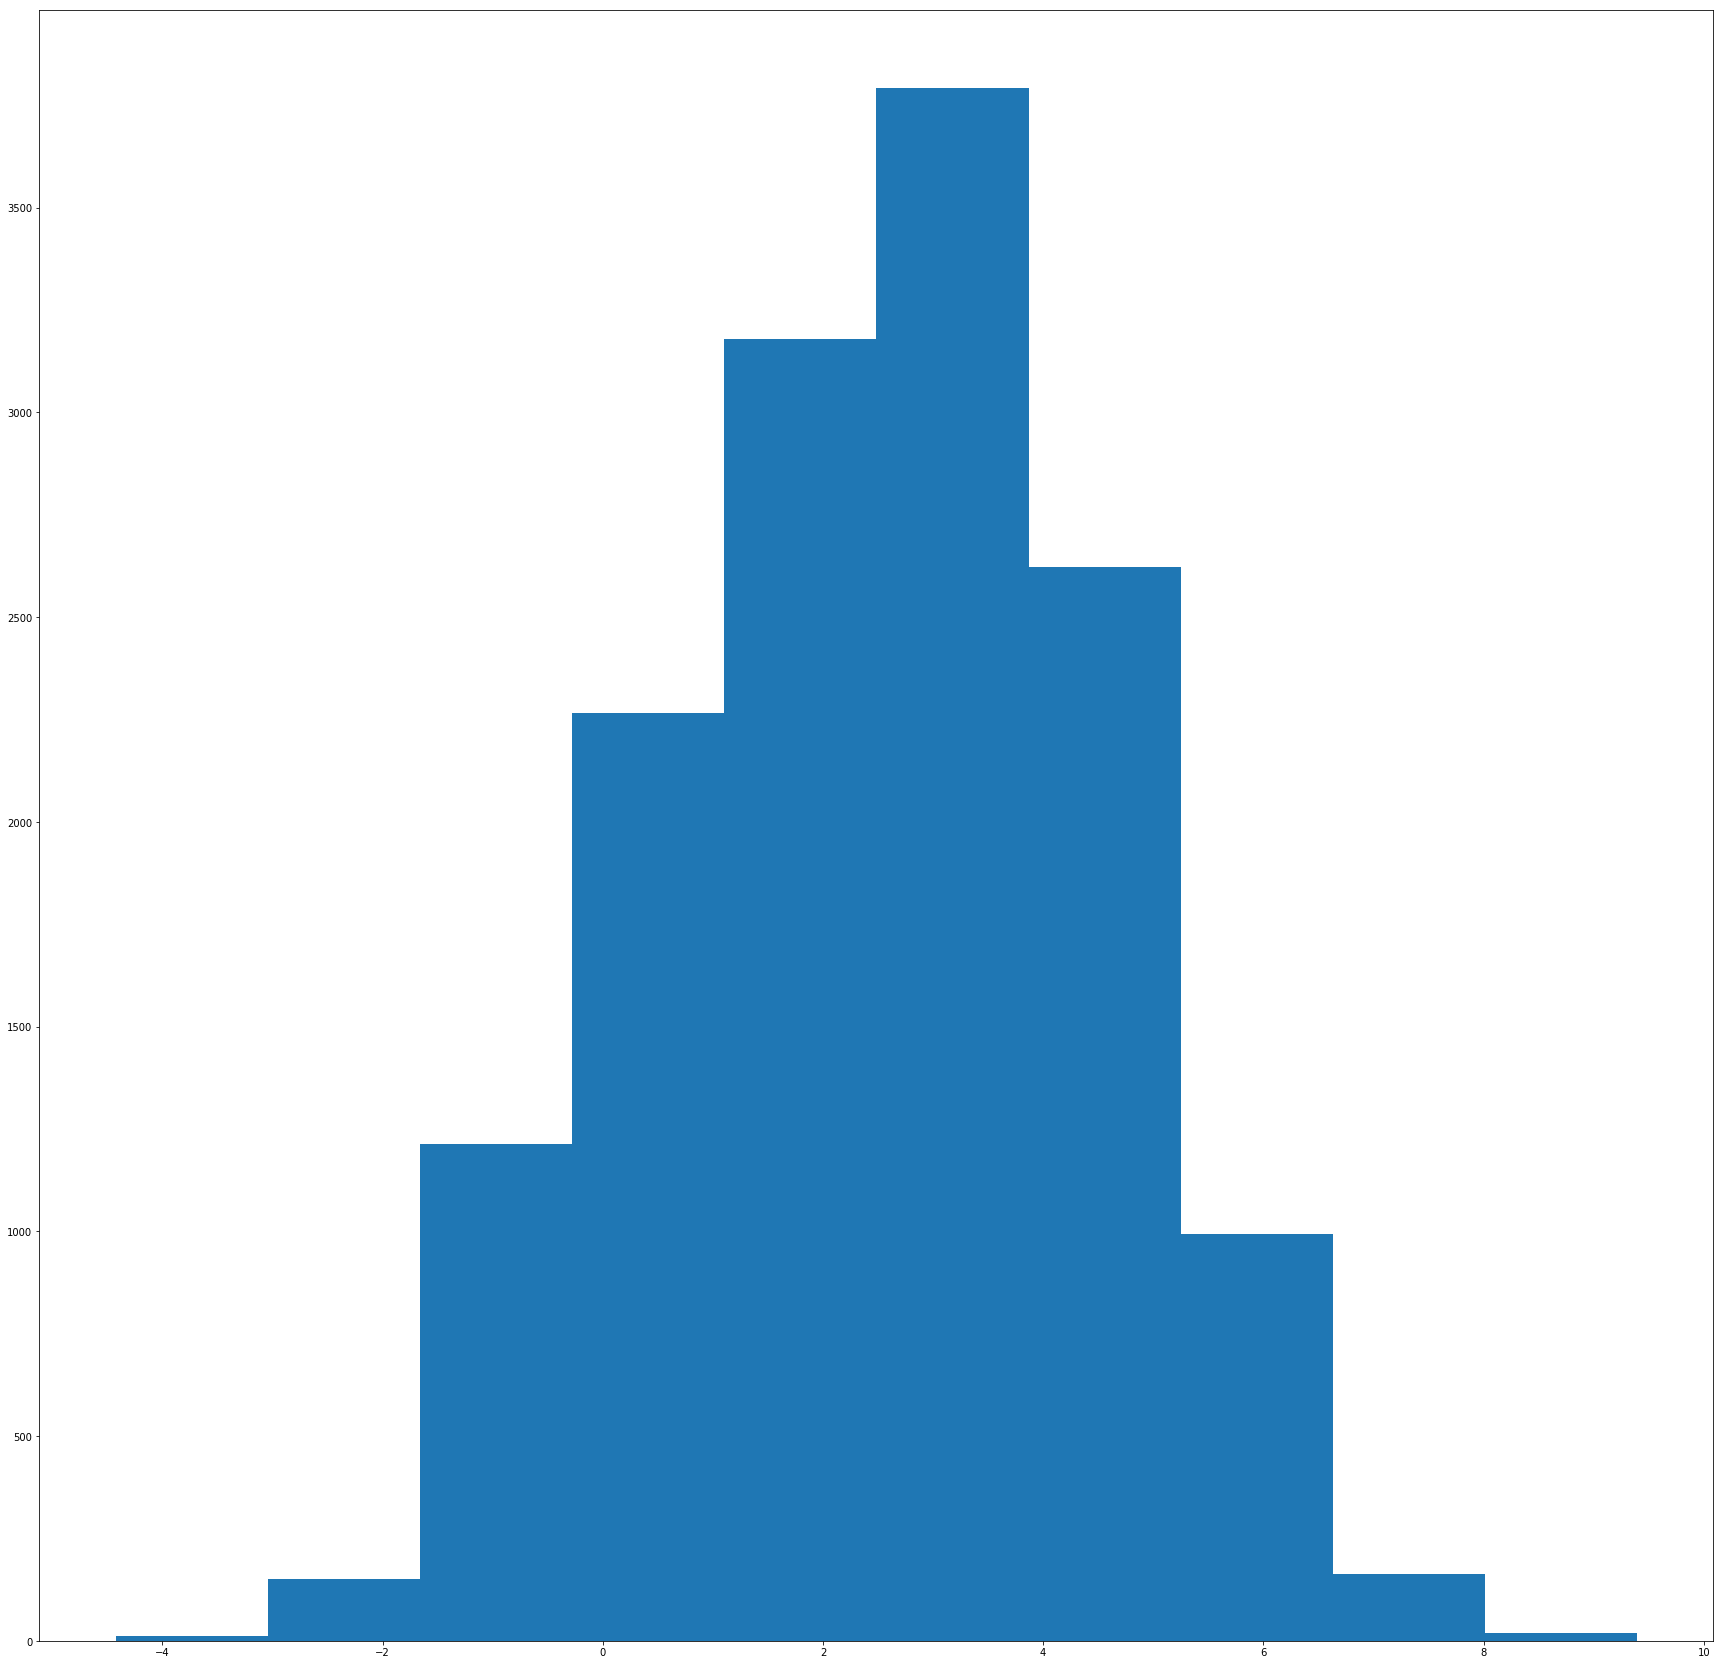

In [81]:
f = plt.figure()
ax = f.add_subplot(111)
x = (era_new['t2']-era_new['t2_s'])
y = (era_new['d925'])*10000
ax.hist(x)